In [10]:
from typing import Dict, Tuple, List
import numpy as np
import matplotlib.pyplot as plt

# Type aliases
Coord = Tuple[int, int]        # (row, col)
Params = Tuple[float, float, float]  # (x, y, z)

In [11]:
COEFFS: Dict[Coord, Tuple[int, int, int]] = {
    (0,0): ( 1,  0,  0),
    (0,1): ( 0,  1,  0),
    (0,2): (-1, -1,  3),
    (1,0): (-2, -1,  4),
    (1,1): ( 0,  0,  1),
    (1,2): ( 2,  1, -2),
    (2,0): ( 1,  1, -1),
    (2,1): ( 0, -1,  2),
    (2,2): (-1,  0,  2),
}

In [21]:
def square_from_params(x: float, y: float, z: float) -> np.ndarray:
    S = np.zeros((3,3), dtype=float)
    for (r,c), (cx, cy, cz) in COEFFS.items():
        S[r, c] = cx*x + cy*y + cz*z
    return S

def build_C_v(constraints: Dict[Coord, float]) -> Tuple[np.ndarray, np.ndarray, List[Coord]]:
    Cs, vs, order = [], [], []
    for pos, val in constraints.items():
        cx, cy, cz = COEFFS[pos]
        Cs.append([cx, cy, cz])
        vs.append(val)
        order.append(pos)
    C = np.array(Cs, dtype=float)
    v = np.array(vs, dtype=float)
    return C, v, order

def plot_square(S: np.ndarray, title: str = "Magic 3x3") -> None:
    fig, ax = plt.subplots(figsize=(4,4), dpi=140)
    ax.set_xlim(0,3); ax.set_ylim(0,3)
    ax.set_xticks(range(4)); ax.set_yticks(range(4)); ax.grid(True)
    ax.invert_yaxis(); ax.set_xticklabels([]); ax.set_yticklabels([])
    for r in range(3):
        for c in range(3):
            ax.text(c+0.5, r+0.5, f"{S[r,c]:g}", ha="center", va="center", fontsize=14)
    ax.set_title(title)
    plt.show()

def plot_error(message: str) -> None:
    fig, ax = plt.subplots(figsize=(5,3), dpi=140)
    ax.axis('off')
    ax.text(0.5, 0.5, f"❌ {message}", ha="center", va="center", fontsize=12, color="red")
    plt.show()

def solve_magic3_exact(constraints: Dict[Coord, float], tol: float = 1e-9):
    """
    Exact solver:
      - Requires EXACTLY 3 constraints.
      - Matrix must be invertible (constraints linearly independent).
      - Solves C p = v with np.linalg.solve (no least squares).
      - If anything fails, shows an error plot and returns None.
    """
    m = len(constraints)
    if m != 3:
        plot_error(f"Se requieren exactamente 3 datos. Recibidos: {m}.")
        return None

    C, v, order = build_C_v(constraints)

    # Check invertibility (rank 3)
    # if np.linalg.matrix_rank(C) < 3:
    #     plot_error("Los 3 datos no son independientes (matriz singular). Elige otras celdas.")
    #     return None

    # Solve exactly
    try:
        p = np.linalg.solve(C, v)  # exact solution
    except np.linalg.LinAlgError as e:
        plot_error(f"No se pudo resolver el sistema: {e}")
        return None

    x, y, z = p.tolist()
    S = square_from_params(x, y, z)

    # Verify that the three constrained cells match exactly (within tol)
    for (r, c), target in constraints.items():
        if abs(S[r, c] - target) > tol:
            plot_error("Inconsistencia detectada tras resolver (no coincide con los datos).")
            return None

    # All good → plot result
    M = 3*z
    plot_square(S, title=f"Magic 3x3 exacto (M={M:g})")
    return S, (x, y, z), M

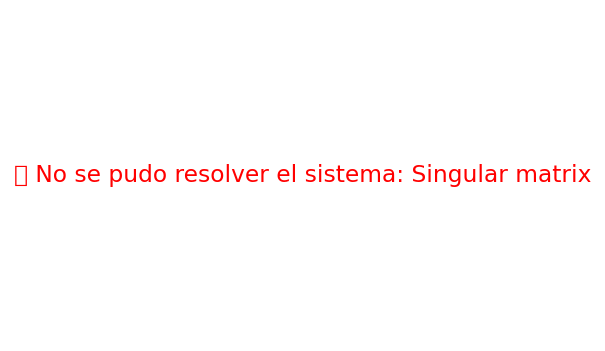

In [22]:
constraints_singular = {(0,0): 1, (2,2): 2, (1,1): 1}  # Puede o no ser singular según valores; probamos.
solve_magic3_exact(constraints_singular)